<a href="https://colab.research.google.com/github/mrcrdg/jupyter_set/blob/master/Decision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Decision Trees

## The Example

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Load and process the data

In [ ]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, 
                                                    random_state=42)

Build and train the model

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth =2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualize the Tree:

In [ ]:
from sklearn import tree

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.214\nsamples = 41\nvalue = [0, 5, 36]')]

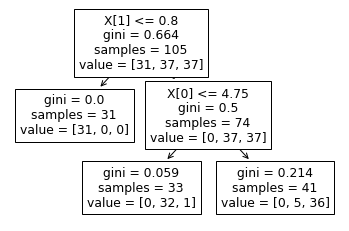

In [ ]:
tree.plot_tree(tree_clf)

Do predictions used the trained model

In [ ]:
print(tree_clf.score(X_test, y_test))

1.0


# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Build and train the model

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Do predictions used the trained model

In [ ]:
print(rnd_clf.score(X_test, y_test))

0.8241702741702742


# Exercises

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

We will use the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset for classifying handwritten digits.

## Download and uncompress the data

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=125hS7C-Ib13SqFc_D2a1TJSRVKCZbkPd

Downloading...
From: https://drive.google.com/uc?id=125hS7C-Ib13SqFc_D2a1TJSRVKCZbkPd
To: /content/train_mnist.csv.zip
9.61MB [00:00, 30.6MB/s]


In [ ]:
!unzip train_mnist.csv.zip

Archive:  train_mnist.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd

In [ ]:
mnist_data = pd.read_csv("train.csv")

In [ ]:
print(mnist_data.shape)

(42000, 785)


In [ ]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_X = mnist_data.iloc[:,1:]
mnist_y = mnist_data.iloc[:,:1]

Now we split our data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_X, mnist_y, 
                                                    test_size=0.33, 
                                                    random_state=42)

## Tasks

1. Build and train a Decision Tree to perform the classification of this dataset;
  * Try to tune the hyperparameters for this algorithm. see [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
1. Build a Random Forest to perform the classifiation of this dataset;
1. Build a Pipeline for pre-processing the data (try scaling/normalizing);
1. Use the [Grid Search Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best hyperparameter for both the Decision Tree and the Random Forest